In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
from astropy.io import ascii
import os
import sys
from ipywidgets import interactive, widgets,fixed
from IPython.display import Audio, display
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (11., 8.0)
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
rcParams['axes.labelsize']='x-large'
rcParams['legend.fontsize']=17.
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [16]:
sneqCF=np.loadtxt('sneqCF')
sneqCF2=np.loadtxt('sneqCF2')
sneqCF3=np.loadtxt('sneqCF3')
cooltable=np.loadtxt('cooltable.dat')
H2CF=np.loadtxt('H2CF')

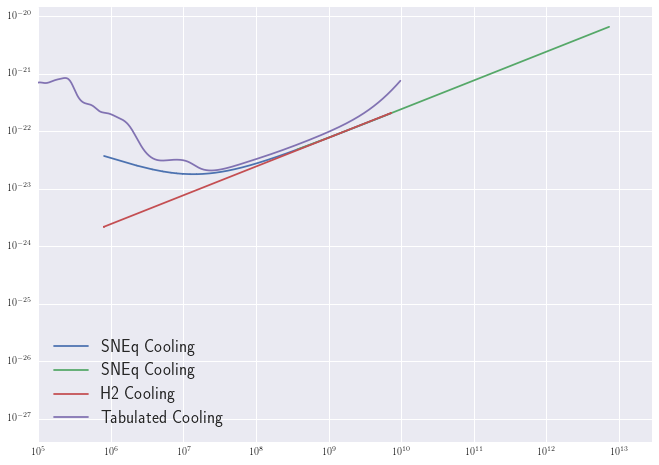

In [28]:
plt.loglog(sneqCF[:,0],sneqCF[:,1],label='SNEq Cooling')
#plt.loglog(sneqCF2[:,0],sneqCF2[:,1])
plt.loglog(sneqCF3[:,0],sneqCF3[:,1],label='SNEq Cooling')
plt.loglog(H2CF[:,0],H2CF[:,1],label='H2 Cooling')
plt.loglog(cooltable[:,0],cooltable[:,1],label='Tabulated Cooling')
plt.xlim([1e5,None])
plt.legend(loc='best')
plt.savefig('cooling-functions.png')

In [33]:
T=cooltable[:,0]
L=cooltable[:,1]

In [34]:
Ti=np.logical_and(T>1e8,T<1e9)

In [56]:
def ff(x,b,c): return b*x +c 

In [57]:
pars,dev2=curve_fit(ff,np.log10(T[Ti]),np.log10(L[Ti]),[1.,1.])
pars,dev2

(array([  0.47399369, -26.28953117]),
 array([[  2.96428335e-06,  -2.52076606e-05],
        [ -2.52076606e-05,   2.14607165e-04]]))

In [99]:
TT=np.logspace(8,16,400)

$$
\log y =b\log x +c \\
y= x^{b} 10^{c} 
$$

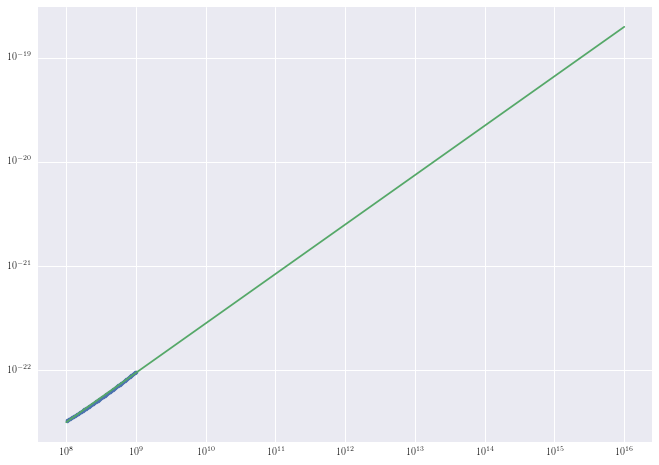

In [100]:
plt.loglog(T[Ti],L[Ti],'.')
plt.loglog(TT,TT**pars[0] *10.**(pars[1]))

In [101]:
Tnew=np.append(T[T<1e8],TT)
Lnew=np.append(L[T<1e8],TT**pars[0] *10.**(pars[1]))

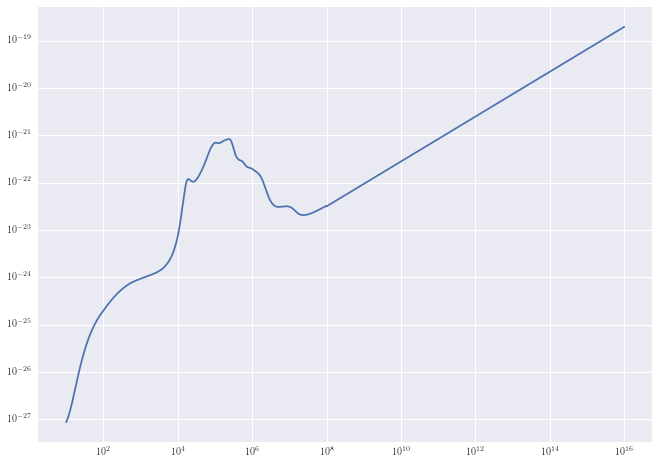

In [116]:
plt.loglog(Tnew,Lnew)

In [115]:
np.savetxt('cooltable_new.dat',np.c_[Tnew,Lnew])